In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from make_data_table import *
from wrangle_helpers import *
from mean_regressor import *

In [3]:
#build_data_file()

New files downloaded: {'EXTR_RPSale.csv', 'EXTR_ResBldg.csv', 'EXTR_Parcel.csv'}
PINs added to tables
Tables merged and saved to: /Users/jarodc33/Mod_Projects/mod_3/oop-regressor-seattle-ds-012720/data/housing2019.csv
All downloaded files have been deleted.
Data is now accessible from the data folder.


In [2]:
data = load_and_wrangle_data('data/housing2019.csv')[1]

In [3]:
columns = ['SalePrice', 'BldgGrade', 'TidelandShoreland', 'SqFtOpenPorch', 'SqFtDeck', 'Area', 'ViewScore','YrRenovated']
data = data[columns]

In [4]:
X = data.drop(['SalePrice'], axis = 1)
y = data['SalePrice']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

In [26]:
model = MeanRegressor()

In [27]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [28]:
train_r_squared = model.score(X_train, y_train)
train_r_squared

0.0

In [29]:
test_r_squared = model.score(X_test, y_test)
test_r_squared

-0.00022155313128235932

This is very low compared to our 0.435 from the best model. This makes sense because we are just taking the mean of 30000 points and setting that as the predicted value. It is close to 0. r^2 cant be negative but I believe we are seeing a negative because of a conglomeration of a lot of rounding errors.

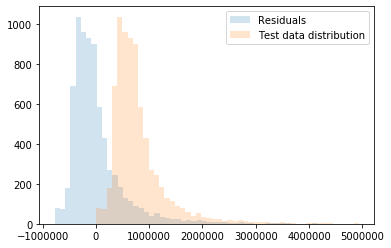

In [54]:
y = y_test
y_hat = predictions
plt.hist(y-y_hat, bins = 50, alpha = 0.2, label = 'Residuals')
plt.hist(y, bins = 50, alpha = 0.2, label = 'Test data')
plt.legend();

This is the distribution of residuals in blue. This is just a shift of the test data by the mean of the training data because the 'predicted' values are all the same (mean of t_train).